### **Retinopatia Diabética**
Copyright 2020 The GooGolPlex Authors.
Licensed under the Apache License, Version 2.0 (the "License");

*   Data Scientist Jose R F Junior - web2ajax@gmail.com
*   Project: Retinopatia Diabética

Sobre Retinopatia Diabética : [Artigo](https://www.linkedin.com/pulse/retinopatia-diab%C3%A9tica-jose-r-f-junior/)

##Retinopatia Diabética

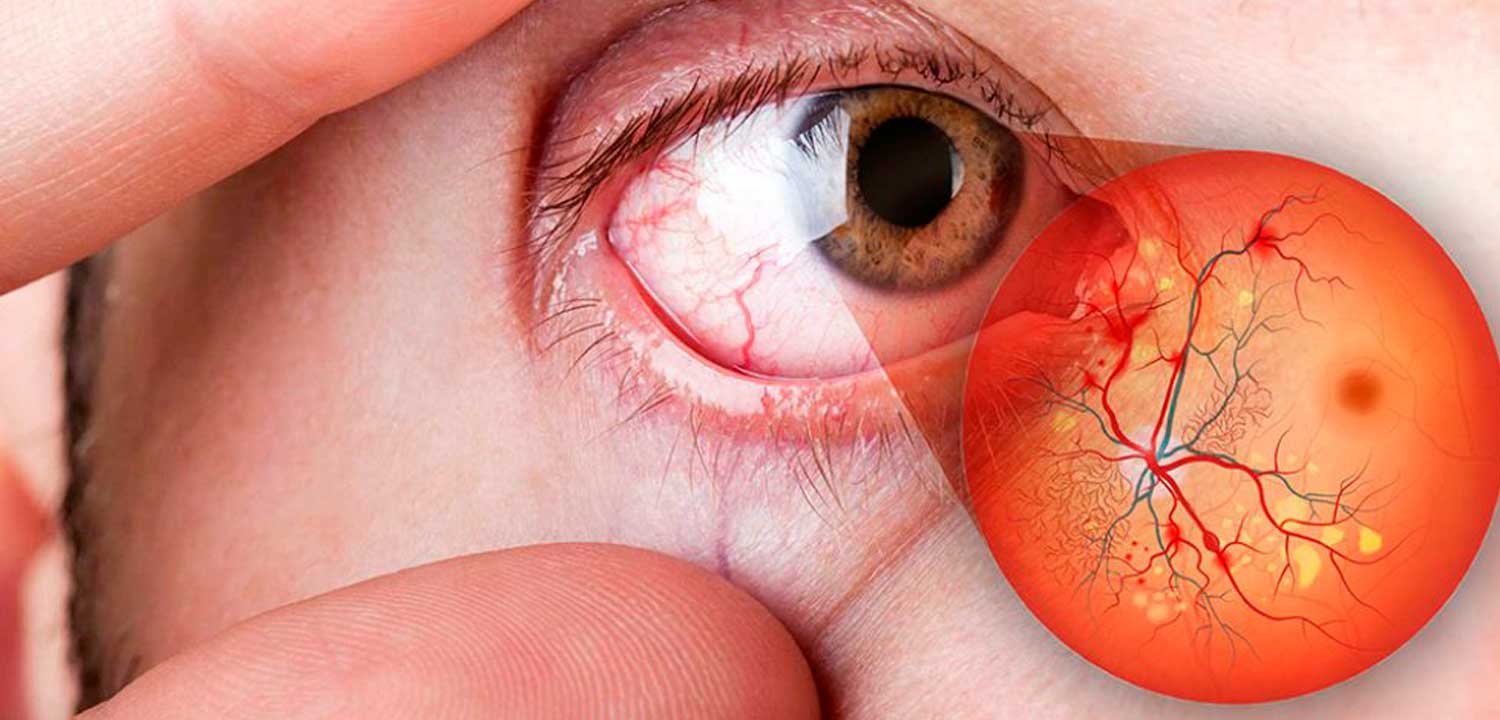

## Fluxo de trabalho:
0. Infraestructura dos dados
1. Examine e entenda os dados
2. Construa um pipeline de entrada
3. Construa o modelo
4. Treine o modelo
5. Teste o modelo
6. Melhore o modelo e repita o processo
7. Salvando o modelo para produção

## ( 0 )INSTALANDO TENSORFLOW
Infraestructura dos dados

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

GOOGGLE DRIVE MOUNT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DOWNLOAD DOS DADOS - se o drive do google estiver montado, nao precisa fazer

In [ ]:
!cp /content/drive/My\ Drive/rd/*.* /content/

In [ ]:
!unzip /content/A.\ Segmentation.zip

In [ ]:
!unzip /content/B.\ Disease\ Grading.zip

In [ ]:
import os
import shutil
os.chdir('/')
pasta_inicial = 8863
zero = '/0/'
um = '/1/'
# VAI COPIAR TODOS ARQUIVOS DA PASTA 0/1 
# PARA A PASTA TRAIN -> POSITOV/NEGATIVO, PASTA VALIDATION --> POSITOV/NEGATIVO
path_origem = '/'

path_destino_train_postivo = '/content/drive/My Drive/IDC_regular_ps50_idx5/train/positivo/'
path_destino_train_negativo = '/content/drive/My Drive/IDC_regular_ps50_idx5/train/negativo/'

path_destino_validation_postivo = '/content/drive/My Drive/IDC_regular_ps50_idx5/validation/positivo/'
path_destino_validation_negativo = '/content/drive/My Drive/IDC_regular_ps50_idx5/validation/negativo/'

root_src_dir_train_positivo = (path_origem + str(pasta_inicial) + zero)
root_target_dir_train_positivo = path_destino_train_postivo

root_src_dir_train_negativo = (path_origem + str(pasta_inicial) + um)
root_target_dir_train_negativo = path_destino_train_negativo

root_src_dir_validation_positivo = (path_origem + str(pasta_inicial) + zero)
root_target_dir_validation_positivo = path_destino_validation_postivo

root_src_dir_validation_negativo = (path_origem + str(pasta_inicial) + um)
root_target_dir_validation_negativo = path_destino_validation_negativo

operation = 'copy'  # 'copy' or 'move'
while pasta_inicial < 16896:
    #train
    for root_src_dir_train_positivo, dirs, files in os.walk(root_src_dir_train_positivo):
        dst_dir = root_src_dir_train_positivo.replace(root_src_dir_train_positivo, root_target_dir_train_positivo)
        for file_ in files:
            src_file = os.path.join(root_src_dir_train_positivo, file_)
            dst_file = os.path.join(dst_dir, file_)
            if operation is 'copy':
                shutil.copy(src_file, dst_dir)
    for root_src_dir_train_negativo, dirs, files in os.walk(root_src_dir_train_negativo):
        dst_dir = root_src_dir_train_negativo.replace(root_src_dir_train_negativo, root_target_dir_train_negativo)
        for file_ in files:
            src_file = os.path.join(root_src_dir_train_negativo, file_)
            dst_file = os.path.join(dst_dir, file_)
            if operation is 'copy':
                shutil.copy(src_file, dst_dir)
    #validation
    for root_src_dir_validation_positivo, dirs, files in os.walk(root_src_dir_validation_positivo):
        dst_dir = root_src_dir_validation_positivo.replace(root_src_dir_validation_positivo, root_target_dir_validation_positivo)
        for file_ in files:
            src_file = os.path.join(root_src_dir_validation_positivo, file_)
            dst_file = os.path.join(dst_dir, file_)
            if operation is 'copy':
                shutil.copy(src_file, dst_dir)
    for root_src_dir_validation_negativo, dirs, files in os.walk(root_src_dir_validation_negativo):
        dst_dir = root_src_dir_validation_negativo.replace(root_src_dir_validation_negativo, root_target_dir_validation_negativo)
        for file_ in files:
            src_file = os.path.join(root_src_dir_validation_negativo, file_)
            dst_file = os.path.join(dst_dir, file_)
            if operation is 'copy':
                shutil.copy(src_file, dst_dir)
    print("COPIANDO ARQUIVO NUMERO:",pasta_inicial, " ATE --> 16896") 
    pasta_inicial += 1            



DIRETORISO ONDE VAI SER TREINADO E VALIDADO

In [ ]:
PATH = '/content/drive/My Drive/IDC_regular_ps50_idx5/'

In [ ]:
train_dir = os.path.join(PATH, 'train/')
validation_dir = os.path.join(PATH, 'validation/')

In [ ]:
train_positivo_dir = os.path.join(train_dir, 'positivo')  # directory with our training POSITIVO pictures
train_negativo_dir = os.path.join(train_dir, 'negativo')  # directory with our training NEGATIVO pictures
validation_positivo_dir = os.path.join(validation_dir, 'positivo')  # directory with our validation POSITIVO pictures
validation_negativo_dir = os.path.join(validation_dir, 'negativo')  # directory with our validation NEGATIVO pictures

## ( 1 ) ENTENDENDO OS DADOS 
Examine e entenda os dados

In [ ]:
num_positivo_tr = len(os.listdir(train_positivo_dir))
num_negativo_tr = len(os.listdir(train_negativo_dir))

num_positivo_val = len(os.listdir(validation_positivo_dir))
num_negativo_val = len(os.listdir(validation_negativo_dir))

total_train = num_positivo_tr + num_negativo_tr
total_val = num_positivo_val + num_negativo_val

In [ ]:
print('total treino positivo imagens:', num_positivo_tr)
print('total treino negativo imagens:', num_negativo_tr)

print('total treino positivo imagens:', num_positivo_tr)
print('total validacao negativa imagens:', num_negativo_tr)
print("--")
print("Total treino imagens:", total_train)
print("Total validacao imagens:", total_val)

In [ ]:
## DEFINICOES DE VARIAVEIS GLOABIS
batch_size = 128 #TAMANHO DO BATCH
epochs = 15 #QUANTIDADE DE EPOCAS QUE A REDE VAI TREINAR
IMG_HEIGHT = 150 #ALTURA DA IMAGEM
IMG_WIDTH = 150 #LARGURA DA IMAGEM

## ( 2 ) Preparação de dados
Construa um pipeline de entrada

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Gerador para nossos dados de treinamento
validation_image_generator = ImageDataGenerator(rescale=1./255) # Gerador para nossos dados de validação

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

## Visualize imagens de treinamento


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# Plotar 10 imagens 10x10
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:10])

In [ ]:
#Plotar 5 imagens 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:5])

## ( 3 ) Criar o Modelo

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compila o Modelo


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##Sumario do Modelo

In [ ]:
model.summary()

## ( 4 ) Treina o Modelo

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

## ( 5 ) Visualiza o Resultado do Treino

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ( 6 ) Melhore o modelo e repita o processo
plicar rotação horizontal

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
# Reutilize a mesma função de plotagem personalizada definida e usada acima para visualizar as imagens de treinamento
plotImages(augmented_images)

## Gire a imagem aleatoriamente

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

## Aplicar aumento de zoom

In [ ]:
# zoom_range de 0 - 1 quando 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

##Coloca tudo junto

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

## Dropout -  Criando uma nova rede com Dropouts

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

##Compilar o modelo

In [ ]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

## Treina o modelo

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

##Visualize the model

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)



## ( 7 ) Salvando o modelo para produção
Criando o diretório para o modelo

In [ ]:
model_dir = "/content/drive/My Drive/IDC_regular_ps50_idx5/modelo/"
version = 1

In [ ]:
export_path = os.path.join(model_dir, str(version))
export_path

##Salvando o modelo para o TensorFlow Serving

In [ ]:
model.input

In [ ]:
model.outputs

In [ ]:
o = {t.name: t for t in model.outputs}

In [ ]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir = export_path,
                           inputs = {"input_image": model.input},
                           outputs = {t.name: t for t in model.outputs})

##Configuração do ambiente de produção

Exportando o MODEL_DIR para as variáveis de ambiente

In [ ]:
os.environ["model_dir"] = os.path.abspath(model_dir)

Executando a API TensorFlow Serving REST

In [ ]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${model_dir}" >server.log 2>&1

In [ ]:
!tail server.log

##Criando a primeira requisição POST

In [ ]:
random_image = np.random.randint(0, len(X_test))

In [ ]:
random_image

##Criando o objeto JSON

In [ ]:
data = json.dumps({"signature_name": "serving_default", "instances": [X_test[random_image].tolist()]})

In [ ]:
data

##Enviando a primeira requisição POST para o modelo

In [ ]:
headers = {"content-type": "application/json"}

In [ ]:
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data = data, headers = headers)

In [ ]:
json_response

In [ ]:
predictions = json.loads(json_response.text)['predictions']

In [ ]:
predictions

In [ ]:
plt.imshow(X_test[random_image])

In [ ]:
class_names[np.argmax(predictions[0])]

##Enviando a requisição POST para um modelo específico que está armazendo no servidor

In [ ]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data = data, headers = headers)

In [ ]:
specific_json_response